# Signal Processing

* Look at some basic signal processing methods
* Ways to extract information from speech recordings
* Look at the problem of speech/silence classification
* Analyse an audio recording, find regions of speech (non silence)

# Digital Signal

* Read our WAV file into a numpy array using librosa
* Gives us a one dimensional array of integers and a sample rate
* Forms the basis of all of our analysis

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set(style="dark")
plt.rcParams['figure.figsize'] = (16, 5)
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display

# Read an Audio File

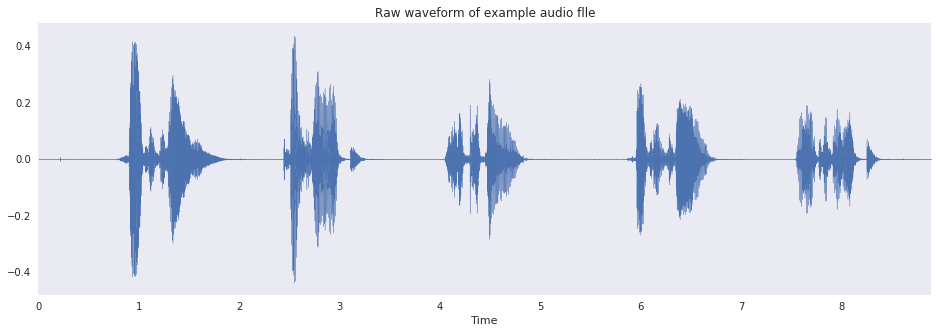

In [9]:
x, sr = librosa.load("../data/digits.wav")
librosa.display.waveplot(x, sr=sr)
plt.title("Raw waveform of example audio flle")
Audio(x, rate=sr)

# Process Frames of Data

* Step along the signal 
* Process one frame of data at a time
* For each frame, calculate features
* Results in a new, smaller array of features, one per frame
* Two parameters: 
    * frame length - size of frame
    * hop length - how much to move each step

In [70]:
frame_length = 1024
hop_length = 512

# Note that almost all of pysptk functions assume input array is C-contiguous and np.float4 element type
frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length).astype(np.float64).T
frames.shape

(382, 1024)

# Calculate energy

* Energy in a frame will be high if it contains speech
* For each frame of data
* Calculate the energy in the frame
* Sum of the square amplitudes in each frame

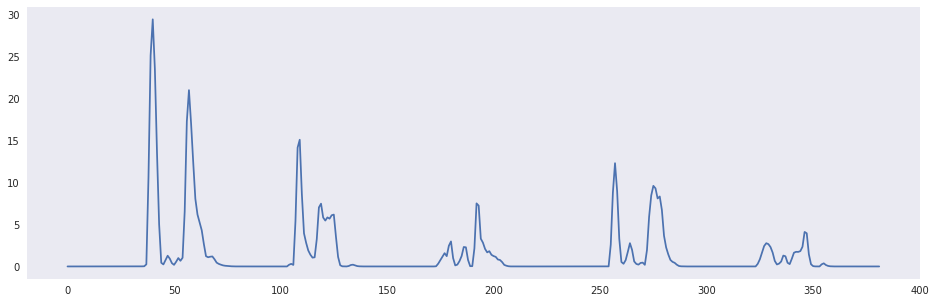

In [72]:
energy = (frames**2).sum(axis=1)
plt.plot(energy)

# Zero Crossing Rate

* Energy is high for voiced speech but not for unvoiced
* Fricative noise source is low in energy
* Look as well at a crude measure of frequency
    * Zero Crossing Rate
* How many times does the signal cross the zero axis?

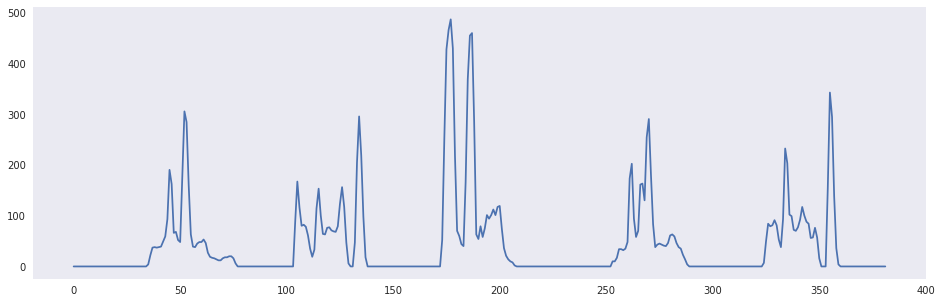

In [73]:
zcr = np.array([librosa.core.zero_crossings(f, threshold=0.01).sum() for f in frames])
plt.plot(zcr)

# Normalisation

* Energy ranges from 0-30
* ZCR ranges from 0-500
* If we add them together, ZCR would dominate
* So, normalise each one by dividing by the maximum
* Normalised range will be from 0-1

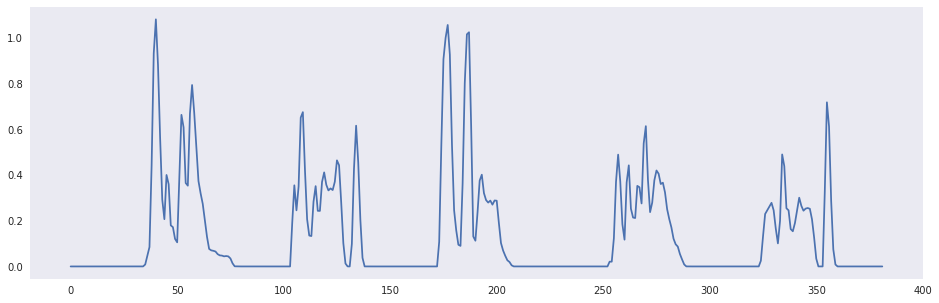

In [68]:
# Use the ptp method to get the peak-to-peak range for an array
zcr = zcr/zcr.ptp()
energy = energy/energy.ptp()
combined = zcr+energy
plt.plot(combined)

# Use a Threshold 

* Test whether the combined metric is greater than a threshold
* Result is True if there is speech, False otherwise
* Note there are still some gaps
* Could post-process to ignore silence shorter than a threshold value

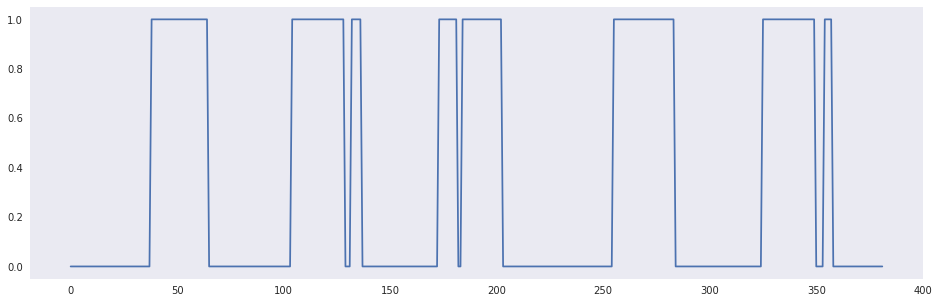

In [69]:
plt.plot(combined > 0.1)